# Example 2 - Folded Layer

This example will show how to convert the geological map below to a `GemPy` model. This example is based on digitized data. The area is 865 m wide (W-E extent) and 866 m high (N-S extent).
<img src='../../../gemgis/data/examples/example2/task2.png' width="300">

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load Data

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example2/task2.png')
interfaces = gpd.read_file('../../../gemgis/data/examples/example2/interfaces2_lines.shp')
orientations = gpd.read_file('../../../gemgis/data/examples/example2/orientations2.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example2/extent2.shp')
topo = gpd.read_file('../../../gemgis/data/examples/example2/topo2.shp')
custom_section = gpd.read_file('../../../gemgis/data/examples/example2/customsections2.shp')

C:\Users\user_abuser\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


# Inspect Data

In [3]:
interfaces.head()

id formation    Z                                           geometry
0  None    Layer1    0  LINESTRING (750.000 865.441, 764.514 845.629, ...
1  None    Layer1   50  LINESTRING (628.941 863.195, 637.925 850.294, ...
2  None    Layer1  100  LINESTRING (534.604 865.153, 549.463 845.687, ...
3  None    Layer1  150  LINESTRING (458.590 864.955, 473.370 845.597, ...
4  None    Layer1  100  LINESTRING (2.577 102.527, 17.435 83.097, 25.0...

In [4]:
orientations.head()

id    Z  dip  azimuth formation                 geometry
0  None  350   31      233    Layer1  POINT (319.826 436.957)
1  None  300   31      233    Layer1  POINT (276.736 359.570)
2  None  250   31      233    Layer1  POINT (237.163 271.630)
3  None  200   27      233    Layer1  POINT (189.675 194.243)
4  None  150   25      233    Layer1  POINT (117.565 124.770)

In [5]:
extent.head()

id                                           geometry
0  None  POLYGON ((0.000 866.000, 865.000 866.000, 865....

In [6]:
topo.head()

id    Z                                           geometry
0  None  350  LINESTRING (1.385 62.877, 136.138 47.987, 292....
1  None  300  LINESTRING (1.571 124.111, 129.996 110.524, 22...
2  None  250  LINESTRING (0.082 198.374, 59.641 178.273, 118...
3  None   50  LINESTRING (863.690 271.706, 829.815 271.334, ...
4  None  100  LINESTRING (864.062 307.070, 828.326 304.092, ...

In [7]:
custom_section.head()

id   section                                     geometry
0  None  Section1  LINESTRING (1.593 388.445, 852.428 865.929)

# Create GemPy Data Class

In [8]:
geo_data = gg.GemPyData(model_name='Model2', 
                        crs='EPSG:4326')

In [9]:
vars(geo_data)

{'model_name': 'Model2',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'faults': None,
 'is_fault': None}

# Set Extent

In [10]:
geo_data.set_extent(gdf=extent, minz=-50, maxz=400)
geo_data.extent

[0.0, 865.0, 0.0, 866.0, -50, 400]

# Set Resolution

In [11]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

# Plot Data

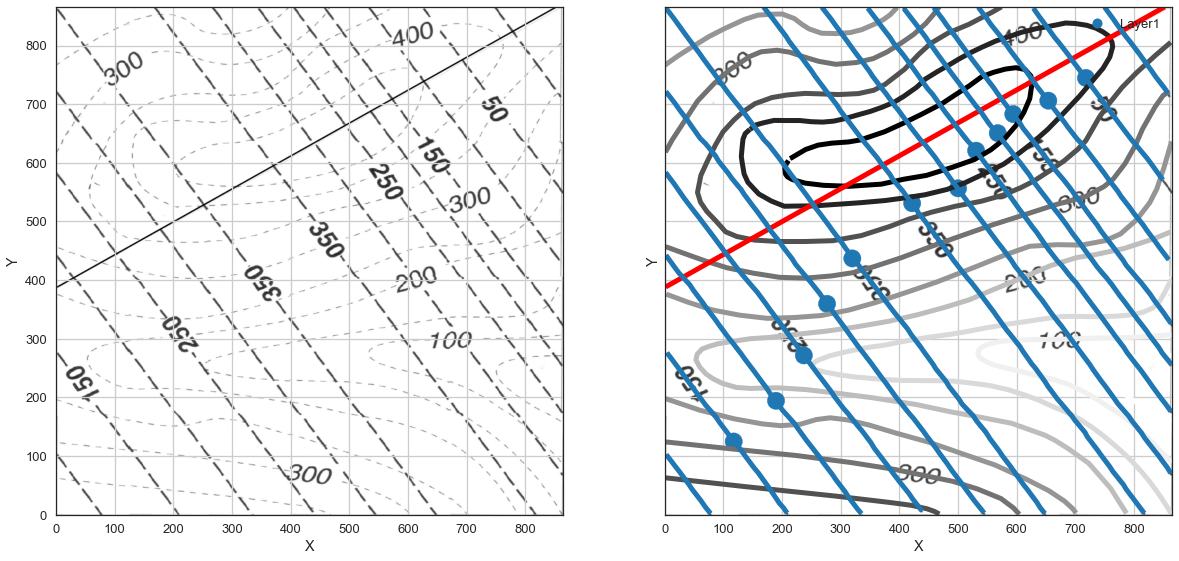

In [12]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
custom_section.plot(ax=ax2, legend = False, linewidth = 5,color='red')
interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 5)
orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

# Interpolate Topography

In [13]:
dem = gg.vector.interpolate_raster(topo, method='rbf')
dem

array([[376.20250341, 376.17026864, 376.13726861, ..., 151.2072866 ,
        150.62305109, 150.12421308],
       [375.82182976, 375.78933294, 375.75603738, ..., 150.71949949,
        150.13832737, 149.64002732],
       [375.44007438, 375.40730712, 375.3737062 , ..., 150.30268463,
        149.73838827, 149.24734253],
       ...,
       [240.46392464, 240.37584045, 240.28945558, ..., 359.90575305,
        359.60167206, 359.29757301],
       [240.45275522, 240.36385251, 240.27663029, ..., 359.98508309,
        359.6833359 , 359.38156858],
       [240.44305532, 240.3533452 , 240.26529712, ..., 360.06230619,
        359.76289529, 359.46346152]])

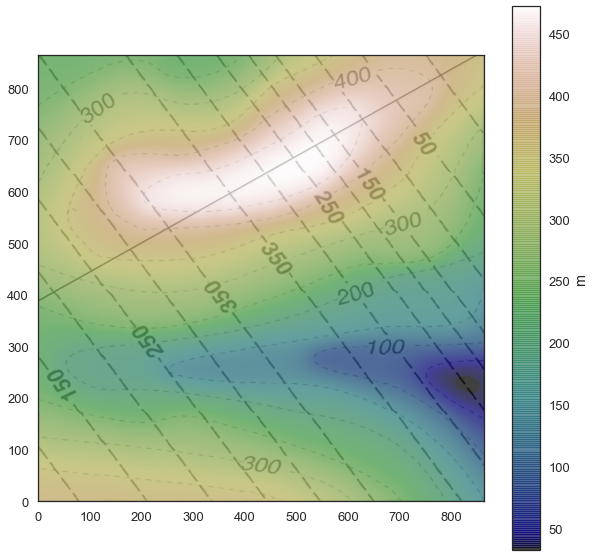

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
im = plt.imshow(dem,origin = 'lower', alpha=0.75, cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')

# Save Topography as Raster

In [15]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example2/topo.tif',dem, crs='EPSG:4326', extent=[0,870,0,870])#geo_data.extent)

In [16]:
topography = rasterio.open('../../../gemgis/data/examples/example2/topo.tif')
topography

<open DatasetReader name='../../../gemgis/data/examples/example2/topo.tif' mode='r'>

# Set Interfaces

In [17]:
interfaces_coords = gg.vector.extract_xy(interfaces)
interfaces_coords.head()

id formation  Z                                           geometry  \
0  None    Layer1  0  LINESTRING (750.000 865.441, 764.514 845.629, ...   
0  None    Layer1  0  LINESTRING (750.000 865.441, 764.514 845.629, ...   
0  None    Layer1  0  LINESTRING (750.000 865.441, 764.514 845.629, ...   
0  None    Layer1  0  LINESTRING (750.000 865.441, 764.514 845.629, ...   
0  None    Layer1  0  LINESTRING (750.000 865.441, 764.514 845.629, ...   

                                   points           X           Y  
0  (750.0003891306708, 865.4411014639877)  750.000389  865.441101  
0   (764.513747612086, 845.6292152830081)  764.513748  845.629215  
0  (770.9641291593817, 836.1840137316109)  770.964129  836.184014  
0  (785.9382291798895, 815.9113860115388)  785.938229  815.911386  
0  (793.7708353444629, 806.2358136905951)  793.770835  806.235814

In [18]:
geo_data.to_gempy_df(interfaces_coords.sample(n=50), 'interfaces')
geo_data.interfaces.head()

index           X           Y    Z formation
0     10  443.138232  501.466693  350    Layer1
1      2  659.003935  698.019145  100    Layer1
2      9  132.393145  689.158249  350    Layer1
3      3  827.632894  376.063843  150    Layer1
4      2  778.105623  542.749246  100    Layer1

# Set Orientations

In [19]:
orientations_coords = gg.vector.extract_xy(orientations)
orientations_coords

id    Z   dip  azimuth formation                 geometry           X  \
0   None  350  31.0    233.0    Layer1  POINT (319.826 436.957)  319.826277   
1   None  300  31.0    233.0    Layer1  POINT (276.736 359.570)  276.735730   
2   None  250  31.0    233.0    Layer1  POINT (237.163 271.630)  237.162779   
3   None  200  27.0    233.0    Layer1  POINT (189.675 194.243)  189.675237   
4   None  150  25.0    233.0    Layer1  POINT (117.565 124.770)  117.564526   
5   None  350  33.0     53.0    Layer1  POINT (421.837 531.052)  421.836552   
6   None  300  39.0     53.0    Layer1  POINT (500.103 556.555)  500.103056   
7   None  250  46.0     53.0    Layer1  POINT (530.882 620.751)  530.882018   
8   None  200  50.0     53.0    Layer1  POINT (567.817 650.651)  567.816772   
9   None  150  39.0     53.0    Layer1  POINT (594.199 683.188)  594.198740   
10  None  100  34.0     53.0    Layer1  POINT (653.998 706.053)  653.997866   
11  None   50  27.0     53.0    Layer1  POINT (718.194 744.746)  718.193987   

             Y  
0   436.956689  
1   359.569585  
2   271.629693  
3   194.242588  
4   124.770074  
5   531.052374  
6   556.554942  
7   620.751063  
8   650.650627  
9   683.188387  
10  706.052758  
11  744.746311

In [20]:
geo_data.to_gempy_df(orientations_coords, 'orientations')
geo_data.orientations.head()

index           X           Y    Z formation   dip  azimuth  polarity
0      0  319.826277  436.956689  350    Layer1  31.0    233.0         1
1      1  276.735730  359.569585  300    Layer1  31.0    233.0         1
2      2  237.162779  271.629693  250    Layer1  31.0    233.0         1
3      3  189.675237  194.242588  200    Layer1  27.0    233.0         1
4      4  117.564526  124.770074  150    Layer1  25.0    233.0         1

# Check Data Class

In [21]:
vars(geo_data)

{'model_name': 'Model2',
 'crs': 'EPSG:4326',
 'extent': [0.0, 865.0, 0.0, 866.0, -50, 400],
 'resolution': [50, 50, 50],
 'interfaces':     index           X           Y    Z formation
 0      10  443.138232  501.466693  350    Layer1
 1       2  659.003935  698.019145  100    Layer1
 2       9  132.393145  689.158249  350    Layer1
 3       3  827.632894  376.063843  150    Layer1
 4       2  778.105623  542.749246  100    Layer1
 5       2  666.375800  688.573943  100    Layer1
 6      12  648.227450  461.083800  250    Layer1
 7       8  263.542302  378.222677  300    Layer1
 8       9  547.143228  141.195417  350    Layer1
 9      10  191.062630  836.593903  350    Layer1
 10      7   16.038349  564.136370  250    Layer1
 11     12  390.691268  803.449454  250    Layer1
 12     11  305.607815  814.878575  300    Layer1
 13      6  179.601762  206.531889  200    Layer1
 14      9  108.899953  718.239011  350    Layer1
 15      5  195.475540   19.475284  150    Layer1
 16     10  56

# Add Section Dict

In [22]:
geo_data.to_section_dict(custom_section, 'section')
geo_data.section_dict

{'Section1': ([1.593210345965275, 388.4453900184363],
  [852.4277356922321, 865.9286460336549],
  [100, 80])}

# Add Surface Colors

In [23]:
geo_data.surface_colors = {'Layer1':'#b35a2a', 'basement': '#525252'}
geo_data.surface_colors

{'Layer1': '#b35a2a', 'basement': '#525252'}

# Add Stack

In [24]:
geo_data.stack = {"Strat_Series": ('Layer1')}
geo_data.stack

{'Strat_Series': 'Layer1'}

# Add DEM

In [25]:
geo_data.dem = '../../../gemgis/data/examples/example2/topo2.tif'
geo_data.dem

'../../../gemgis/data/examples/example2/topo2.tif'

# Visualize Data Set

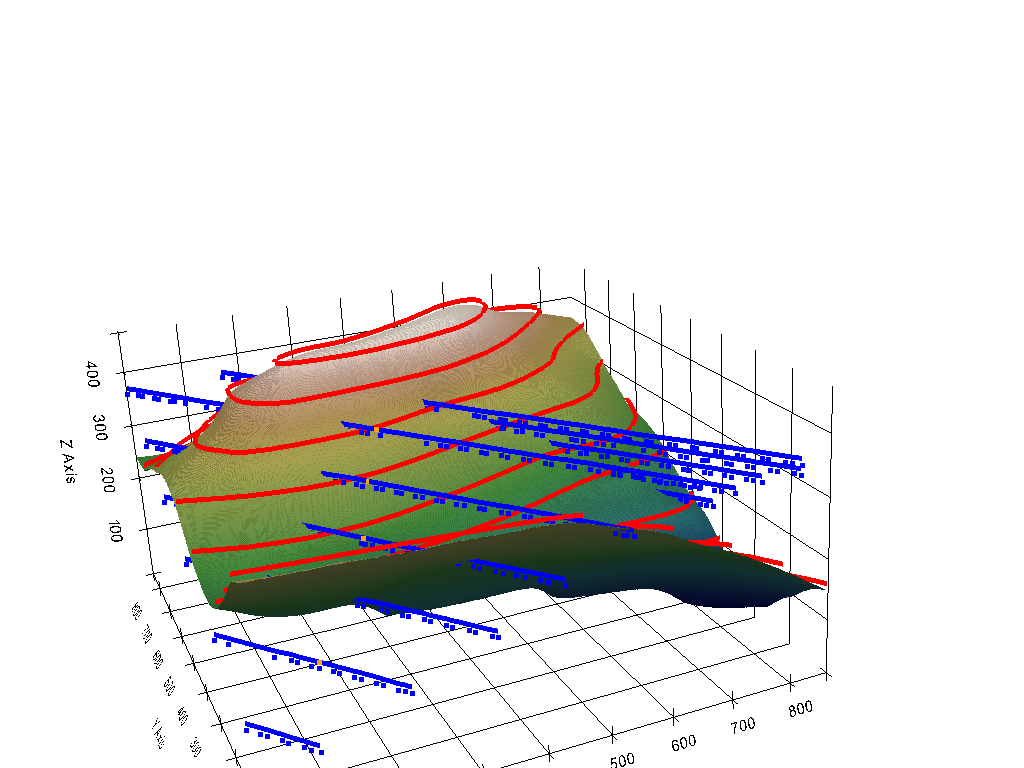

In [26]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(dem, p, cmap = 'gist_earth')
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [27]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from '../../../gempy-master\\gempy\\__init__.py'>
2.2.2


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [28]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model2  2020-08-02 10:40

In [29]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model2  2020-08-02 10:40

In [30]:
geo_model.surfaces

surface          series  order_surfaces    color  id
0  Layer1  Default series               1  #015482   1

In [31]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

surface        series  order_surfaces    color  id
0    Layer1  Strat_Series               1  #015482   1
1  basement  Strat_Series               2  #9f0052   2

In [32]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

surface        series  order_surfaces    color  id
0    Layer1  Strat_Series               1  #b35a2a   1
1  basement  Strat_Series               2  #525252   2

In [33]:
geo_model.set_topography(source='gdal', filepath='../../../gemgis/data/examples/example2/topo.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  8.65      ,   8.66      , -45.5       ],
       [  8.65      ,   8.66      , -36.5       ],
       [  8.65      ,   8.66      , -27.5       ],
       ...,
       [864.49767712, 863.48839907, 360.5065918 ],
       [864.49767712, 864.49303944, 360.58773804],
       [864.49767712, 865.49767981, 360.66662598]])

In [34]:
geo_model.set_section_grid(geo_data.section_dict)

Active grids: ['regular' 'topography' 'sections']


start                                    stop resolution        dist
Section1  [1.593210345965275, 388.4453900184363]  [852.4277356922321, 865.9286460336549]  [100, 80]  975.658572

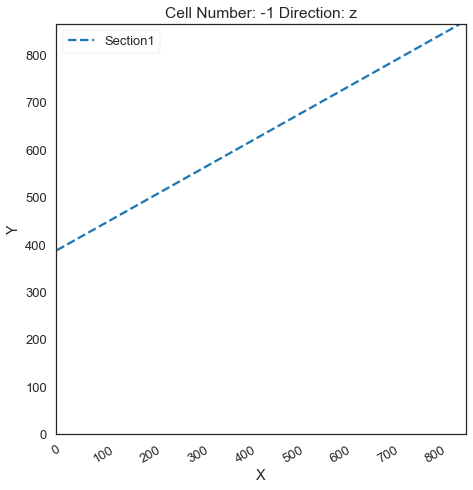

In [35]:
gp.plot.plot_section_traces(geo_model)

In [36]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range             1304.1
$C_o$            40492.4
drift equations      [3]


In [37]:
sol = gp.compute_model(geo_model)

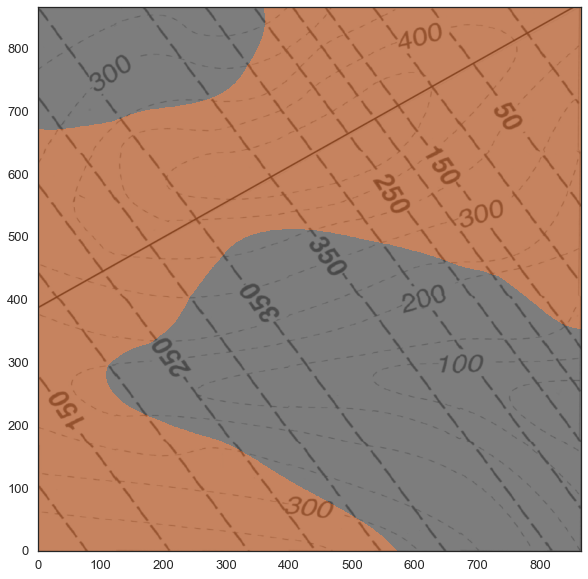

In [38]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#b35a2a', '#525252']
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


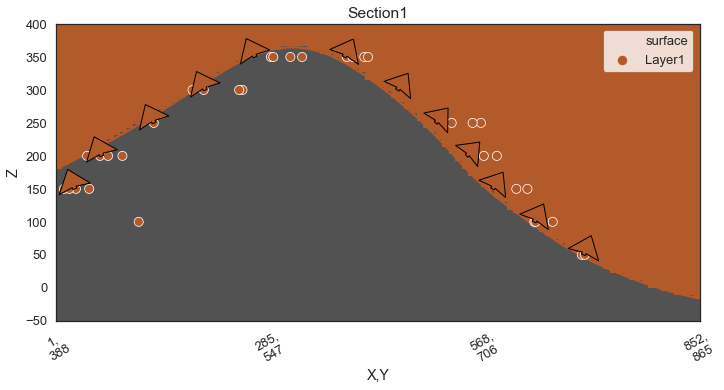

In [39]:
gp.plot_2d(geo_model, section_names=['Section1'])

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


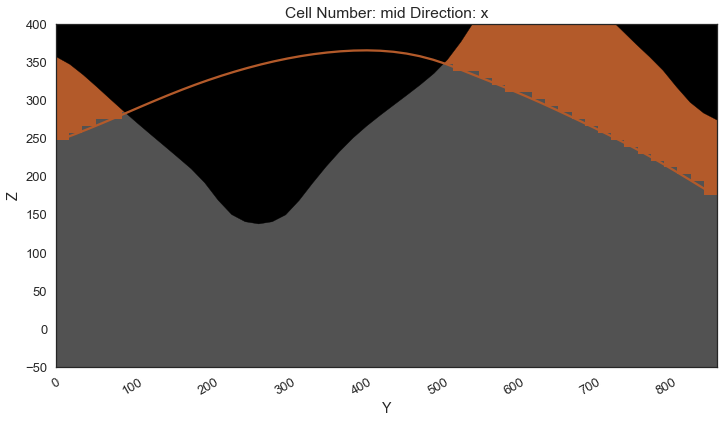

In [40]:
gp.plot_2d(geo_model, direction='x', show_topography=True, show_data=False)

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


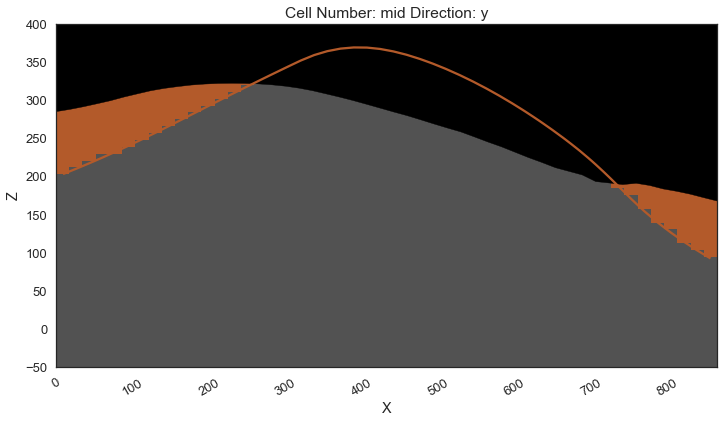

In [41]:
gp.plot_2d(geo_model, direction='y', show_topography=True, show_data=False)

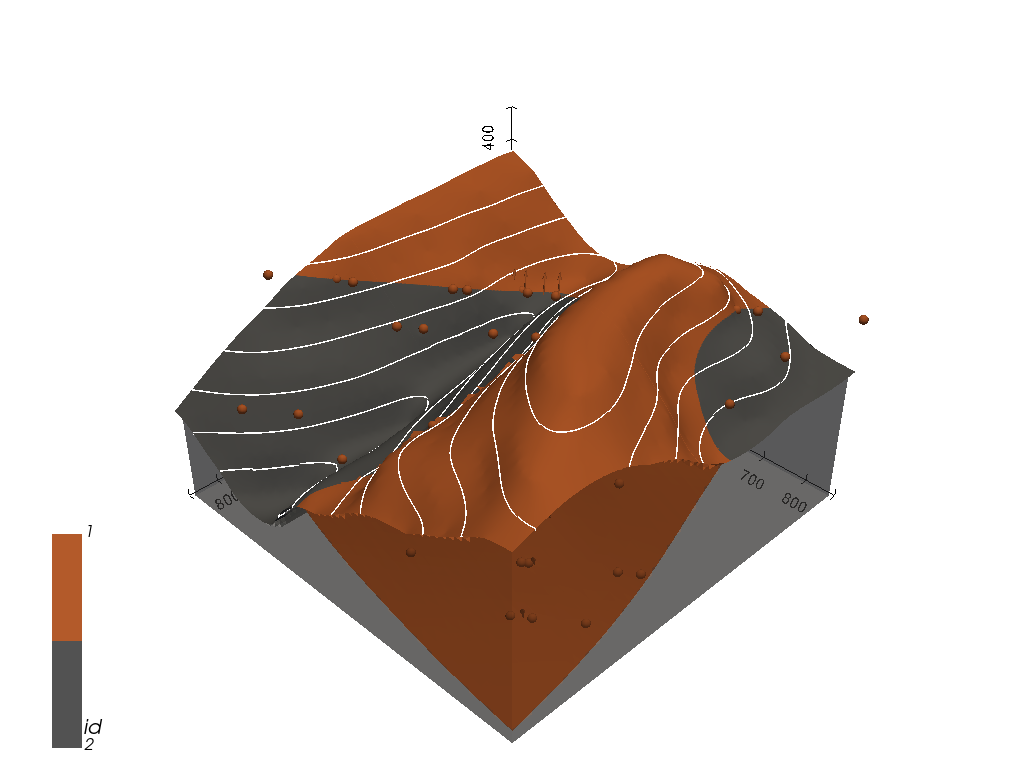

In [42]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [43]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

formation                                           geometry
0  basement  POLYGON ((572.146 0.796, 572.401 0.502, 573.15...
1  basement  POLYGON ((11.553 670.591, 12.558 670.538, 13.5...
2    Layer1  POLYGON ((1.507 0.502, 2.512 0.502, 3.516 0.50...

## Plot Polygons

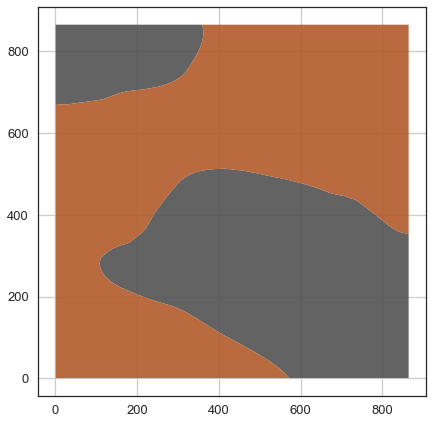

In [44]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [45]:
gdf.to_file('../../../gemgis/data/examples/example2/liths.shp')

<img src='../../../gemgis/data/Images/output_gemgis.png' width="800">

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [46]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example2/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')

# Create borehole from Geo_Model

Geological models are used to extract information from the subsurface. As geologists, we like to look of the result of the model at a single location and down to the maximum z extent in depth. This is termed a borehole or in the case of fluid extraction a well. These boreholes can easily be extracted and displayed using GemGIS. All you need is the `geo_model` object, the `geo_data` object and the location of your borehole, optionally with its maximum depth. 

Active grids: ['regular']
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            450.222
$C_o$            4826.19
drift equations      [3]
[1. 2.]


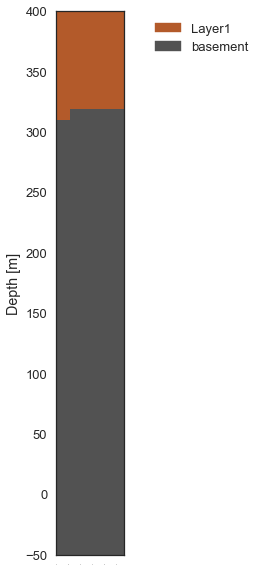

In [47]:
sol = gg.post.extract_borehole(geo_model, geo_data, [600,400])

# Depth Maps

Depth maps indicate the depth of a surface within the model extent. By applying an intuitive color coding, the spatial position of the respective surface can easily be interpreted. Depth maps can easily be created by executing `gg.visualization.plot_depth_map(...)`. All that is needed is the `geo_model` object and the name of the surface to be plotted. Optionally, a range for the colorbar can be provided to make the maps of different surfaces comparable. Otherwise, the min and max values of each surface are taken for the limits of the color bar. By setting `notebook` to `False` an interactive PyVista Window is opened (press 'Q' to close window safely again).

## Depth Map Layer1

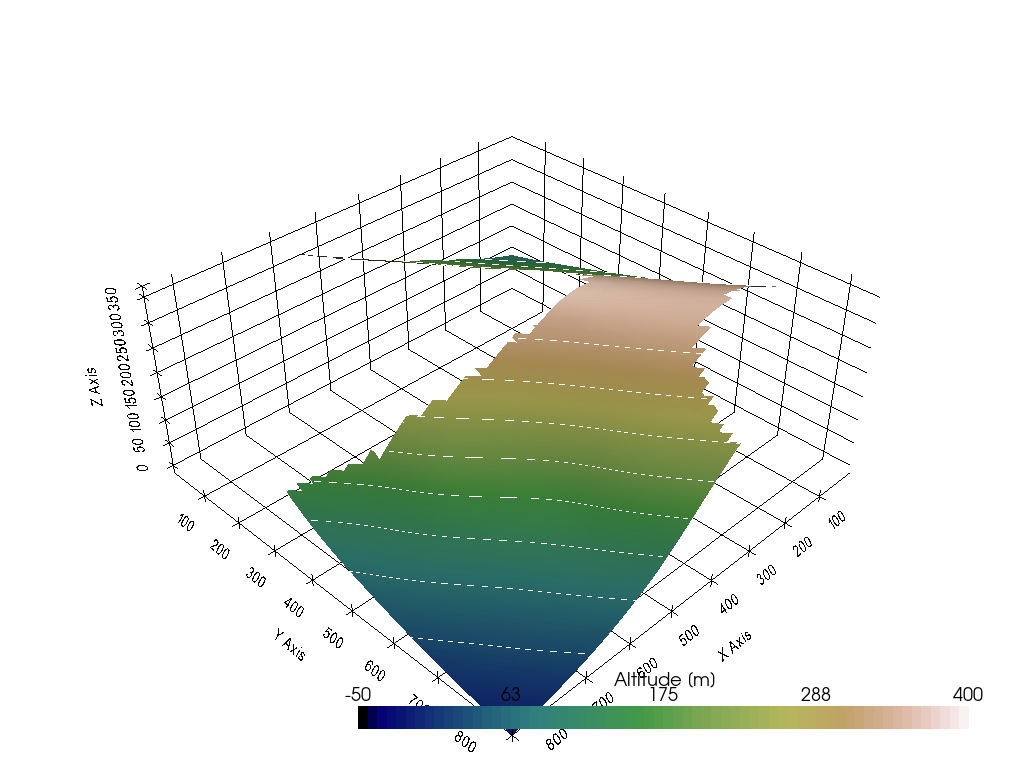

In [48]:
gg.visualization.plot_depth_map(geo_model, 'Layer1', clim=[-50, 400], notebook=True)